## Plot Data

Now, we will also be generate some time series plots using the generated statistic summaries.
- To read the file, we need to define **response_filename** with the concatenated dataset. Here, we are using 'gps_summaries_daily.csv'.

In [30]:
import os
import sys
import glob
import pandas as pd
import yaml

# import hardcoded variables e.g., study name to ID mappings, directory paths, etc. from config file
CONFIG_PATH = "../../config/HOPE_config.yaml"
CONFIG_DIR = os.path.dirname(CONFIG_PATH)

with open(CONFIG_PATH, "r") as f:
    config = yaml.safe_load(f)

data_dir = os.path.abspath(os.path.join(CONFIG_DIR, config["data_dir"]))
raw_data_dir = os.path.abspath(os.path.join(CONFIG_DIR, config["raw_data_dir"]))
metadata_path = os.path.abspath(os.path.join(CONFIG_DIR, config["metadata_path"]))

In [31]:
import matplotlib.pyplot as plt
import os
import pandas as pd

direc = data_dir


response_filename = 'gps_summaries_daily.csv'
path_resp = os.path.join(direc, response_filename)    

# read data
response_data = pd.read_csv(path_resp)

# GPS data (jasmine)
response_data['Date'] = pd.to_datetime(response_data[['year', 'month', 'day']])

# Accelerometer data (oak)
# response_data.rename(columns={'date': 'Date'}, inplace=True)

Here, I'm testing plotting the trajectory for a single subject (beiwe id 2n18iikg) for whom gps summary worked

In [10]:
response_data.head(20)

,Beiwe_ID,year,month,day,obs_duration,obs_day,obs_night,home_time,dist_traveled,max_dist_home,...,av_flight_length,sd_flight_length,av_flight_duration,sd_flight_duration,total_pause_time,av_pause_duration,sd_pause_duration,physical_circadian_rhythm,physical_circadian_rhythm_stratified,Date
0,2n18iikg,2018,6,6,0.463889,0.283333,0.180556,5.141926,140.702,129.735746,...,2.298800,11.101354,0.292960,2.160776,5.916852,0.125890,0.331375,0.319941,0.277863,2018-06-06
1,2n18iikg,2018,6,7,0.933333,0.527778,0.405556,22.618555,9.591,3.866402,...,0.239775,0.460892,0.022386,0.065426,22.858722,0.313133,1.133834,0.330587,0.261362,2018-06-07
2,2n18iikg,2018,6,8,2.186111,0.902778,1.283333,16.368056,48.783,17.586465,...,0.393043,0.681592,0.009996,0.032915,22.622191,0.133072,0.225505,0.330119,0.264591,2018-06-08
3,2n18iikg,2018,6,9,1.558333,0.708333,0.850000,12.111019,41.398,23.226230,...,0.599971,3.070330,0.029594,0.141547,21.810781,0.159203,0.281373,0.206604,0.033747,2018-06-09
4,2n18iikg,2018,6,10,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-10
5,2n18iikg,2018,6,11,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-11
6,2n18iikg,2018,6,12,1.377778,0.952778,0.425000,19.826389,45.464,16.694107,...,0.461048,1.105825,0.009137,0.030388,23.293587,0.194113,0.804284,0.259388,0.179499,2018-06-12
7,2n18iikg,2018,6,13,2.500000,1.244444,1.255556,22.738889,4.375,1.852061,...,0.076754,0.098002,0.029138,0.084114,22.380817,0.144392,0.129233,0.456112,0.334106,2018-06-13
8,2n18iikg,2018,6,14,1.688889,0.847222,0.841667,16.753537,114.212,49.228210,...,0.747457,1.735605,0.016024,0.047649,21.417265,0.132205,0.462009,0.370975,0.267884,2018-06-14
9,2n18iikg,2018,6,15,1.183333,0.758333,0.425000,19.920008,8.176,3.330844,...,0.110486,0.202865,0.008891,0.034580,23.384285,0.208788,0.982758,0.270049,0.207777,2018-06-15


In [32]:
# Check for NA values
has_na = response_data.isnull().any().any()

# Print the result
print(has_na)

# Check for NA values per column
has_na_per_column = response_data.isnull().any()
print(has_na_per_column)

True
Beiwe_ID                                False
year                                    False
month                                   False
day                                     False
obs_duration                            False
obs_day                                 False
obs_night                               False
home_time                                True
dist_traveled                            True
max_dist_home                            True
radius                                   True
diameter                                 True
num_sig_places                           True
entropy                                  True
total_flight_time                        True
av_flight_length                         True
sd_flight_length                         True
av_flight_duration                       True
sd_flight_duration                       True
total_pause_time                         True
av_pause_duration                        True
sd_pause_duration            

In [55]:
response_data[response_data["dist_traveled"].isnull()]

,Beiwe_ID,year,month,day,obs_duration,obs_day,obs_night,home_time,dist_traveled,max_dist_home,...,av_flight_length,sd_flight_length,av_flight_duration,sd_flight_duration,total_pause_time,av_pause_duration,sd_pause_duration,physical_circadian_rhythm,physical_circadian_rhythm_stratified,Date
4,2n18iikg,2018,6,10,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-10
5,2n18iikg,2018,6,11,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-11
275,2umdx87r,2019,5,10,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-10
276,2umdx87r,2019,5,11,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-11
277,2umdx87r,2019,5,12,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-12
381,2umdx87r,2019,8,24,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-24
405,2umdx87r,2019,9,17,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-17
406,2umdx87r,2019,9,18,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-18


The data needs to be sorted according to date. The following code will sort and create 4 even time intervals in the plot. 

In [33]:
## Make sure the data is sorted according to date
response_data.sort_values('Date', inplace = True)
response_data.reset_index(drop = True, inplace = True)

def time_series_plot(var_to_plot, ylab = '', xlab = 'Date', num_x_ticks = 1):
    for key, grp in response_data.groupby(['Beiwe_ID']):
        plt.plot(response_data.Date, response_data[var_to_plot], label=key)
    
    # if len(response_data['Beiwe_ID'].unique()) > 1: ## more than one user to plot
    #    plt.plot(response_data.Date, response_data[var_to_plot], c=response_data['Beiwe_ID'].astype('category'))
    # else:
    #    plt.plot(response_data.Date, response_data[var_to_plot]) #just one user
    title = f"Time Series Plot of {var_to_plot}"
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    
    ## get evenly indices
    tick_indices = [(i * (len(response_data.Date.unique()) - 1)) // (num_x_ticks - 1) for i in range(num_x_ticks) ]
    
    plt.xticks(response_data.Date.unique()[tick_indices])
    plt.show()

In [62]:
import matplotlib.pyplot as plt

def time_series_plot_mod(var_to_plot, ylab='Distance Traveled (km)', xlab='Date', num_x_ticks=30):
    # Loop over each Beiwe_ID
    for key, grp in response_data.groupby('Beiwe_ID'):
        
        # Create a new figure for each ID
        plt.figure(figsize=(12, 6))
        
        # Plot the data for this specific ID
        plt.plot(grp['Date'], grp[var_to_plot], label=key, marker='o')
        
        # Title and axis labels
        plt.title(f"Time Series Plot of {var_to_plot} for {key}")
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        
        # Generate tick indices for the subset of dates
        unique_dates = grp['Date'].unique()
        # Ensure we don't exceed the number of unique dates
        num_ticks = min(num_x_ticks, len(unique_dates))  
        tick_indices = [
            (i * (len(unique_dates) - 1)) // (num_ticks - 1) 
            for i in range(num_ticks)
        ]
        
        # Boolean mask for missing rows
        missing_mask = grp[var_to_plot].isna()
        
        # Apply the ticks with rotation
        plt.xticks(unique_dates[tick_indices], rotation=45)
        
        # Plot missing data points as red X's (at y=0, for instance)
        # or any y-value that makes sense for your case
        plt.scatter(
            grp.loc[missing_mask, 'Date'],
            [0]*missing_mask.sum(),     # place them at y=0, or some placeholder
            color='red',
            marker='x',
            label='Missing'
        )
        # Optional: if you prefer consistent x-axis across plots, 
        #   you could compute overall min/max date from the entire dataset 
        #   and set limits accordingly. Otherwise, each subplot will have
        #   its own x-axis range based on its data.
        
        # Adjust layout to reduce label clipping
        plt.tight_layout()
        
        # If you want a legend
        plt.legend()
        # Save 
        plt.savefig(f"{key}_{var_to_plot}_plot.png") 
        # Show the plot for this ID
        plt.show()
        plt.close()
        

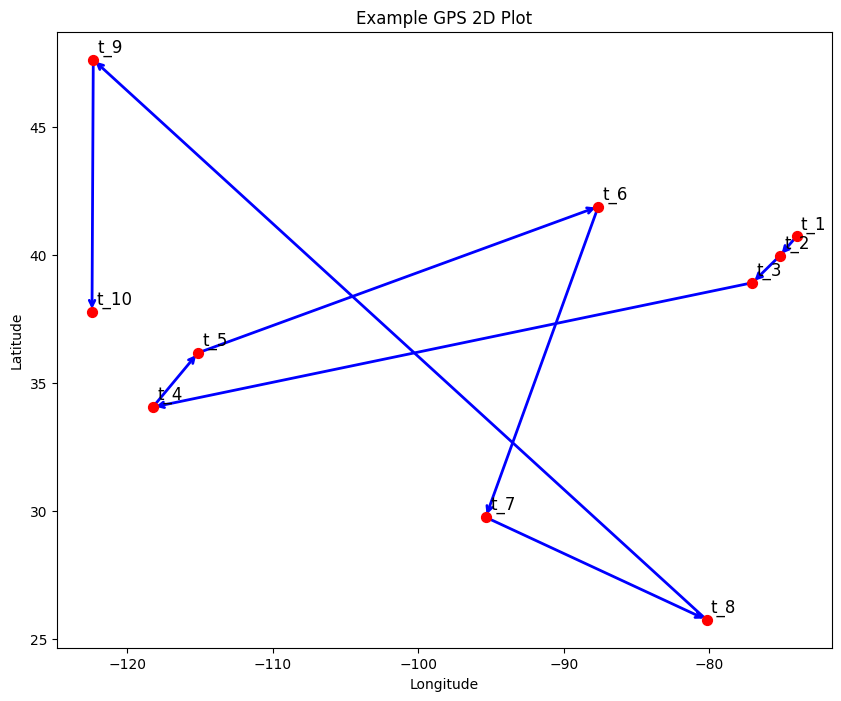

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data including 10 lat, long points and timestamps
data = {
    'latitude': [40.7128, 39.9526, 38.9072, 34.0522, 36.1699, 41.8781, 29.7604, 25.7617, 47.6062, 37.7749],
    'longitude': [-74.0060, -75.1652, -77.0369, -118.2437, -115.1398, -87.6298, -95.3698, -80.1918, -122.3321, -122.4194],
    'timestamp': ['t_1', 't_2', 't_3', 't_4', 't_5', 't_6', 't_7', 't_8', 't_9', 't_10']
}
df = pd.DataFrame(data)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the points
ax.scatter(df['longitude'], df['latitude'], color='red', s=50, zorder=3)

# Label each point with its timestamp
for index, row in df.iterrows():
    ax.text(row['longitude'] + 0.3, row['latitude'] + 0.3, row['timestamp'], fontsize=12, zorder=4)

# Connect points with arrows in the order of t_1 -> t_2 -> ... -> t_10
for i in range(len(df) - 1):
    start = df.iloc[i]
    end = df.iloc[i + 1]
    ax.annotate(
        '', 
        xy=(end['longitude'], end['latitude']), 
        xytext=(start['longitude'], start['latitude']),
        arrowprops=dict(arrowstyle='->', color='blue', lw=2),
        zorder=2
    )

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Example GPS 2D Plot')

plt.show()


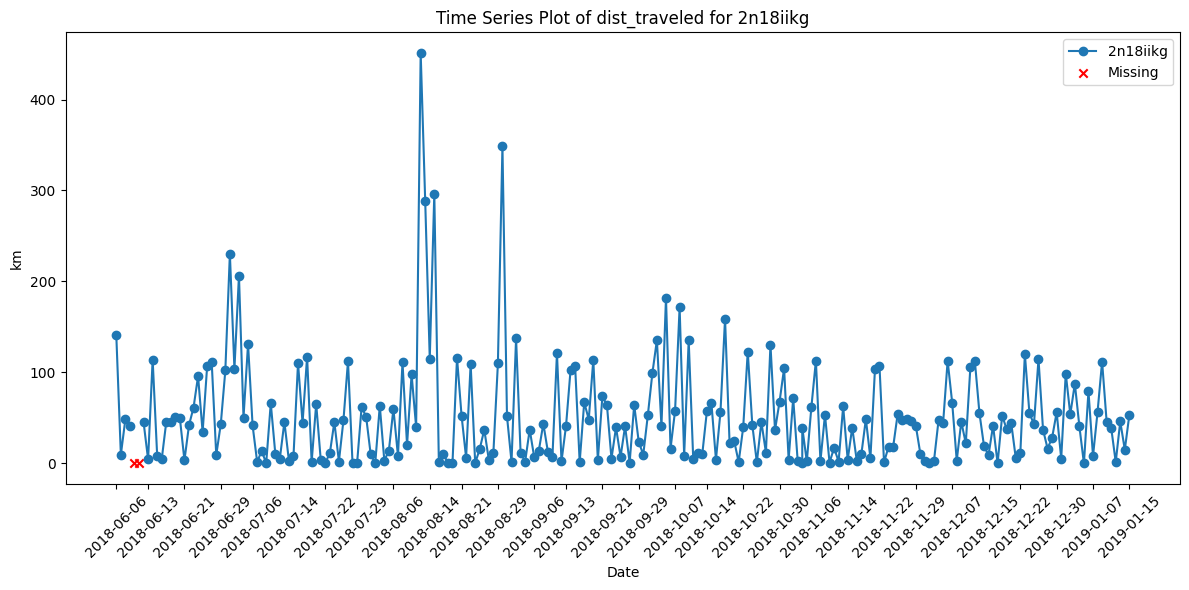

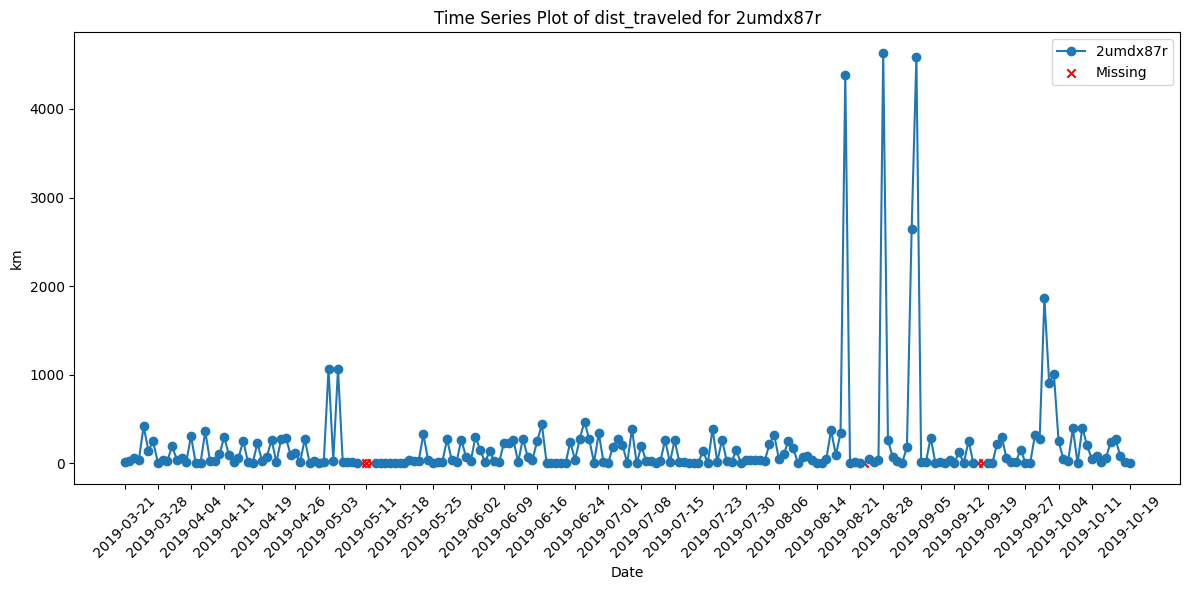

In [63]:
time_series_plot_mod('dist_traveled', ylab = "km")

In [24]:
response_data["Beiwe_ID"].unique()

array(['2n18iikg', '2umdx87r'], dtype=object)

- You can now create time series plots using **time_series_plot('variable')**.

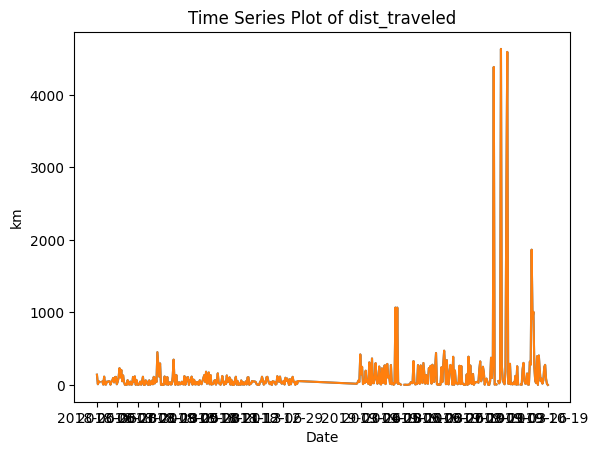

NoneType

In [34]:
type(time_series_plot('dist_traveled', ylab = "km"))


*The output displays a time series plot for the variable, "dist_traveled."*

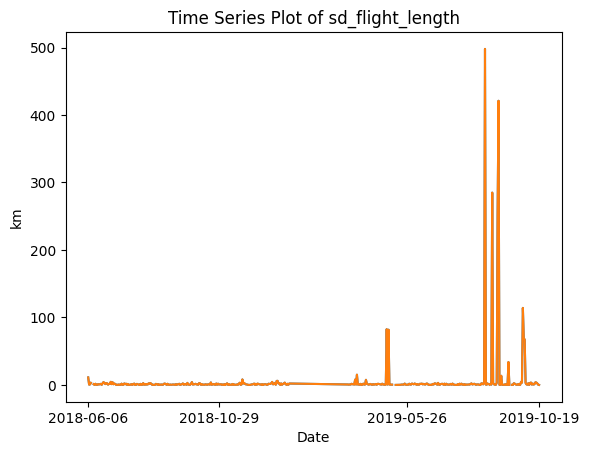

In [19]:
time_series_plot('sd_flight_length', ylab = "km")

*The output displays a time series plot for the variable, "sd_flight_length."*